## up206a: Week 3: Group Assignment #2: Barcelona Property Ownership Profile - 2009

**Casey Leedom**

This assignment uses data from the Barcelona Open Data site regarding property ownership type by neighborhood in Barcelona. Data was analyzed to determine percent of property owned by Spanish nationals, foreigners, and the state. This notebook examines data from 2009, which will be compared to data from 2020. 

### Import geopandas module and dataset

In [62]:
# Import geopandas
import geopandas as gpd

In [63]:
# and regular pandas
import pandas as pd

In [64]:
# to provide basemaps 
import contextily as ctx

In [65]:
# to give more power to your figures (plots)
import matplotlib.pyplot as plt

### Bring in data files

data file #1: spatial data file including geometry for neighborhoods

data file #2: data file for property ownership type (without spatial element)

In [6]:
barri_barcelona = gpd.read_file('Data/shapefiles_barrio_barcelona.geojson')

In [7]:
owntype2009 = gpd.read_file('Data/Ownership Data Barcelona.csv')

### Clean up data file #1: spatial data

Figure out what is included in data set. 
Trim and sort dataframe by neighborhood number in order to match up with second dataframe. 

In [8]:
# Get properties of dataframe

barri_barcelona.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   cartodb_id  73 non-null     int64   
 1   c_distri    73 non-null     object  
 2   n_distri    73 non-null     object  
 3   c_barri     73 non-null     int64   
 4   n_barri     73 non-null     object  
 5   homes       73 non-null     int64   
 6   dones       73 non-null     int64   
 7   area        73 non-null     float64 
 8   perim       73 non-null     float64 
 9   coord_x     73 non-null     float64 
 10  coord_y     73 non-null     float64 
 11  web_1       73 non-null     object  
 12  web_2       73 non-null     object  
 13  web_3       73 non-null     object  
 14  web_4       73 non-null     object  
 15  geometry    73 non-null     geometry
dtypes: float64(4), geometry(1), int64(4), object(7)
memory usage: 9.2+ KB


In [9]:
# Print first 5 rows of dataframe 

barri_barcelona.head()

,cartodb_id,c_distri,n_distri,c_barri,n_barri,homes,dones,area,perim,coord_x,coord_y,web_1,web_2,web_3,web_4,geometry
0,22,05,SarriÃ -Sant Gervasi,22,"Vallvidrera, el Tibidabo i les Planes",2269,2397,1.152241e+07,34375.351100,423973.042970,4.585950e+06,http://www.bcn.cat/sarria-santgervasi,http://www.bcn.cat/estadistica/catala/dades/in...,http://www.bcn.cat/estadistica/catala/dades/gu...,http://www.bcn.cat/estadistica/catala/dades/in...,"MULTIPOLYGON (((2.07327 41.41383, 2.07165 41.4..."
1,23,05,SarriÃ -Sant Gervasi,23,SarriÃ,11552,13267,3.041669e+06,10353.319052,426217.739662,4.584038e+06,http://www.bcn.cat/sarria-santgervasi,http://www.bcn.cat/estadistica/catala/dades/in...,http://www.bcn.cat/estadistica/catala/dades/gu...,http://www.bcn.cat/estadistica/catala/dades/in...,"MULTIPOLYGON (((2.12062 41.41357, 2.12065 41.4..."
2,25,05,SarriÃ -Sant Gervasi,25,Sant Gervasi - la Bonanova,11777,13797,2.235228e+06,8692.896014,427395.900450,4.584820e+06,http://www.bcn.cat/sarria-santgervasi,http://www.bcn.cat/estadistica/catala/dades/in...,http://www.bcn.cat/estadistica/catala/dades/gu...,http://www.bcn.cat/estadistica/catala/dades/in...,"MULTIPOLYGON (((2.13042 41.42065, 2.13049 41.4..."
3,43,07,Horta-GuinardÃ³,43,Horta,12590,14086,3.082269e+06,10888.952207,429246.476929,4.588141e+06,http://www.bcn.cat/horta-guinardo,http://www.bcn.cat/estadistica/catala/dades/in...,http://www.bcn.cat/estadistica/catala/dades/gu...,http://www.bcn.cat/estadistica/catala/dades/in...,"MULTIPOLYGON (((2.16268 41.44105, 2.16273 41.4..."
4,12,03,Sants-MontjuÃ¯c,12,la Marina del Prat Vermell,577,561,1.428413e+07,43242.508489,428356.498514,4.576986e+06,http://www.bcn.cat/sants-montjuic,http://www.bcn.cat/estadistica/catala/dades/in...,http://www.bcn.cat/estadistica/catala/dades/gu...,http://www.bcn.cat/estadistica/catala/dades/in...,"MULTIPOLYGON (((2.17878 41.37342, 2.17860 41.3..."


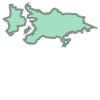

In [10]:
# Test to see if you can extract the geometric coordinates in a cell. (you can't)

barri_barcelona.iloc[0]['geometry']

In [11]:
# Trim the dataframe so that we just have the number of the neighborhood, name of the neighborhood (for backchecking),
# and the geometry. Print the first 5 rows to test. 

barri_barcelona_trimmed = barri_barcelona[['c_barri','n_barri','geometry']]
barri_barcelona_trimmed.head()

,c_barri,n_barri,geometry
0,22,"Vallvidrera, el Tibidabo i les Planes","MULTIPOLYGON (((2.07327 41.41383, 2.07165 41.4..."
1,23,SarriÃ,"MULTIPOLYGON (((2.12062 41.41357, 2.12065 41.4..."
2,25,Sant Gervasi - la Bonanova,"MULTIPOLYGON (((2.13042 41.42065, 2.13049 41.4..."
3,43,Horta,"MULTIPOLYGON (((2.16268 41.44105, 2.16273 41.4..."
4,12,la Marina del Prat Vermell,"MULTIPOLYGON (((2.17878 41.37342, 2.17860 41.3..."


In [12]:
# Sort the dataframe so that it's in order of c_barri (neighborhood number)

bb_sorted = barri_barcelona_trimmed.sort_values(by='c_barri',ascending = True)
bb_sorted.head()

,c_barri,n_barri,geometry
5,1,el Raval,"MULTIPOLYGON (((2.17119 41.38659, 2.17180 41.3..."
23,2,el Barri GÃ²tic,"MULTIPOLYGON (((2.18361 41.38240, 2.18355 41.3..."
26,3,la Barceloneta,"MULTIPOLYGON (((2.20087 41.38606, 2.20070 41.3..."
27,4,"Sant Pere, Santa Caterina i la Ribera","MULTIPOLYGON (((2.18354 41.39255, 2.18461 41.3..."
28,5,el Fort Pienc,"MULTIPOLYGON (((2.18354 41.39255, 2.18249 41.3..."


In [13]:
# Reset the dataframe index (if you don't, things won't line up and for loops won't work!)

bb_sorted = bb_sorted.reset_index(drop=True)

In [14]:
# Print the first 5 rows of dataframe to make sure the indices reset

bb_sorted.head()

,c_barri,n_barri,geometry
0,1,el Raval,"MULTIPOLYGON (((2.17119 41.38659, 2.17180 41.3..."
1,2,el Barri GÃ²tic,"MULTIPOLYGON (((2.18361 41.38240, 2.18355 41.3..."
2,3,la Barceloneta,"MULTIPOLYGON (((2.20087 41.38606, 2.20070 41.3..."
3,4,"Sant Pere, Santa Caterina i la Ribera","MULTIPOLYGON (((2.18354 41.39255, 2.18461 41.3..."
4,5,el Fort Pienc,"MULTIPOLYGON (((2.18354 41.39255, 2.18249 41.3..."


### Clean up data file #2: property ownership datafile

Note: this data file had been cleaned partially in excel. The following was done previously:
1. Converted property ownership types from rows to columns for ease of data use. 
1. Added a column for 'Total' properties for each neighborhood
1. Sorted data by Codi_Barri (same sorting as for bb_sorted) <-- this did not work well in Python, and kept excluding certain data points from the sort. 

In [15]:
# Get properties of dataframe

owntype2009.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Any                  76 non-null     object  
 1   Codi_Districte       76 non-null     object  
 2   Nom_Districte        76 non-null     object  
 3   Codi_Barri           76 non-null     object  
 4   Nom_Barri            76 non-null     object  
 5   NumberOwned_Spanish  76 non-null     object  
 6   NumberOwned_Foreign  76 non-null     object  
 7   NumberOwned_State    76 non-null     object  
 8   Not Applicable       76 non-null     object  
 9   Total                76 non-null     object  
 10  field_11             76 non-null     object  
 11  field_12             76 non-null     object  
 12  geometry             0 non-null      geometry
dtypes: geometry(1), object(12)
memory usage: 7.8+ KB


In [16]:
# Print first 5 rows of dataframe

owntype2009.head()

,Any,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,NumberOwned_Spanish,NumberOwned_Foreign,NumberOwned_State,Not Applicable,Total,field_11,field_12,geometry
0,2009,1,Ciutat Vella,1,el Raval,18725,1837,10370,1532,32464,,,None
1,2009,1,Ciutat Vella,2,el Barri G√≤tic,8865,458,7018,914,17255,,,None
2,2009,1,Ciutat Vella,3,la Barceloneta,8100,271,2749,507,11627,,,None
3,2009,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",11782,657,6061,1551,20051,,,None
4,2009,2,Eixample,5,el Fort Pienc,18616,267,5161,1451,25495,,,None


In [17]:
# Trim dataframe to only include columns we need

owntype2009_trimmed = owntype2009[['Codi_Barri',
                                   'Nom_Barri',
                                   'NumberOwned_Spanish',
                                   'NumberOwned_Foreign',
                                   'NumberOwned_State',
                                   'Not Applicable',
                                   'Total',
                                   'field_11']]

In [18]:
# Print trimmed dataframe

owntype2009_trimmed

,Codi_Barri,Nom_Barri,NumberOwned_Spanish,NumberOwned_Foreign,NumberOwned_State,Not Applicable,Total,field_11
0,1,el Raval,18725,1837,10370,1532,32464,
1,2,el Barri G√≤tic,8865,458,7018,914,17255,
2,3,la Barceloneta,8100,271,2749,507,11627,
3,4,"Sant Pere, Santa Caterina i la Ribera",11782,657,6061,1551,20051,
4,5,el Fort Pienc,18616,267,5161,1451,25495,
...,...,...,...,...,...,...,...,...
71,72,Sant Mart√≠ de Proven√ßals,15305,154,1308,630,17397,
72,73,la Verneda i la Pau,15538,206,2133,812,18689,
73,,,,,,,,
74,,,,,,,,


In [19]:
# Rename columns to match bb_sorted dataframe

owntype2009_trimmed.columns = ['c_barri',
                               'n_barri',
                               'Number of Properties Owned by Spanish Nationals',
                               'Number of Properties Owned by Foreigners',
                               'Number of Properties Owned by State',
                               'Not Applicable',
                               'Total',
                               'geometry']

In [20]:
# Print first five rows to view renamed columns

owntype2009_trimmed.head()

,c_barri,n_barri,Number of Properties Owned by Spanish Nationals,Number of Properties Owned by Foreigners,Number of Properties Owned by State,Not Applicable,Total,geometry
0,1,el Raval,18725,1837,10370,1532,32464,
1,2,el Barri G√≤tic,8865,458,7018,914,17255,
2,3,la Barceloneta,8100,271,2749,507,11627,
3,4,"Sant Pere, Santa Caterina i la Ribera",11782,657,6061,1551,20051,
4,5,el Fort Pienc,18616,267,5161,1451,25495,


In [21]:
# Print last five rows (why are there blank rows??)

owntype2009_trimmed.tail()

,c_barri,n_barri,Number of Properties Owned by Spanish Nationals,Number of Properties Owned by Foreigners,Number of Properties Owned by State,Not Applicable,Total,geometry
71,72,Sant Mart√≠ de Proven√ßals,15305,154,1308,630,17397,
72,73,la Verneda i la Pau,15538,206,2133,812,18689,
73,,,,,,,,
74,,,,,,,,
75,,,,,,,,


In [22]:
# Delete the blank rows at the end of the dataframe. 

owntype2009_trimmed = owntype2009_trimmed.drop(owntype2009_trimmed[owntype2009_trimmed.c_barri == ''].index)

In [23]:
# Print the last 5 rows again to check that the dataframe is correct.

owntype2009_trimmed.tail()

,c_barri,n_barri,Number of Properties Owned by Spanish Nationals,Number of Properties Owned by Foreigners,Number of Properties Owned by State,Not Applicable,Total,geometry
68,69,Diagonal Mar i el Front Marítim del Poblenou,8910,357,1992,291,11550,
69,70,el Bes√≤s i el Maresme,9319,672,1471,348,11810,
70,71,Proven√ßals del Poblenou,11581,143,3039,425,15188,
71,72,Sant Mart√≠ de Proven√ßals,15305,154,1308,630,17397,
72,73,la Verneda i la Pau,15538,206,2133,812,18689,


In [24]:
# We were going to sort here, but the data is already sorted. Rename to match bb_sorted dataframe

ot2009_sorted = owntype2009_trimmed

In [25]:
# Reset the indices for the dataframe

ot2009_sorted = ot2009_sorted.reset_index(drop = True)

In [26]:
# Print first 5 rows to check that indices have been reset

ot2009_sorted.head()

,c_barri,n_barri,Number of Properties Owned by Spanish Nationals,Number of Properties Owned by Foreigners,Number of Properties Owned by State,Not Applicable,Total,geometry
0,1,el Raval,18725,1837,10370,1532,32464,
1,2,el Barri G√≤tic,8865,458,7018,914,17255,
2,3,la Barceloneta,8100,271,2749,507,11627,
3,4,"Sant Pere, Santa Caterina i la Ribera",11782,657,6061,1551,20051,
4,5,el Fort Pienc,18616,267,5161,1451,25495,


### Check compatibility of data types

In order to combine or compare the c_barri column in each dataframe, we need to make sure the data types match. We also need to make sure that we have floats or integers in order to graph, map, and perform math functions. 

In [27]:
# Print type of data in each dataframe column for ot2009_sorted

ot2009_sorted.dtypes

c_barri                                            object
n_barri                                            object
Number of Properties Owned by Spanish Nationals    object
Number of Properties Owned by Foreigners           object
Number of Properties Owned by State                object
Not Applicable                                     object
Total                                              object
geometry                                           object
dtype: object

In [28]:
# Print type of data in each dataframe column for bb_sorted

bb_sorted.dtypes

c_barri        int64
n_barri       object
geometry    geometry
dtype: object

In [29]:
# Convert dataframe object values to integer values where there is a number: for Number of Properties columns, c_barri, and Total.

ot2009_sorted['c_barri'] = ot2009_sorted['c_barri'].astype(int)
ot2009_sorted['Number of Properties Owned by Spanish Nationals'] = ot2009_sorted['Number of Properties Owned by Spanish Nationals'].astype(int)
ot2009_sorted['Number of Properties Owned by Foreigners'] = ot2009_sorted['Number of Properties Owned by Foreigners'].astype(int)
ot2009_sorted['Number of Properties Owned by State'] = ot2009_sorted['Number of Properties Owned by State'].astype(int)
ot2009_sorted['Not Applicable'] = ot2009_sorted['Not Applicable'].astype(int)
ot2009_sorted['Total'] = ot2009_sorted['Total'].astype(int)

In [30]:
# Check that data types have been converted to integer. 

ot2009_sorted.dtypes

c_barri                                             int64
n_barri                                            object
Number of Properties Owned by Spanish Nationals     int64
Number of Properties Owned by Foreigners            int64
Number of Properties Owned by State                 int64
Not Applicable                                      int64
Total                                               int64
geometry                                           object
dtype: object

### Add columns to ot2009_sorted for percentages

In order to normalize the data, we'll want to know the relative percentages for each of the property ownership types. We will create these columns using a math function and the existing property ownership type columns. We will add the following columns:
1. 'Percent Properties Owned by Spanish Nationals'
2. 'Percent Properties Owned by Foreigners'
3. 'Percent Properties Owned by State'
4. 'Percent Not Applicable'

In [31]:
# Add columns to ot2009_sorted dataframe

ot2009_sorted['Percent Properties Owned by Spanish Nationals'] = ot2009_sorted['Number of Properties Owned by Spanish Nationals']/ot2009_sorted['Total']*100
ot2009_sorted['Percent Properties Owned by Foreigners'] = ot2009_sorted['Number of Properties Owned by Foreigners']/ot2009_sorted['Total']*100
ot2009_sorted['Percent Properties Owned by State'] = ot2009_sorted['Number of Properties Owned by State']/ot2009_sorted['Total']*100
ot2009_sorted['Percent Not Applicable'] = ot2009_sorted['Not Applicable']/ot2009_sorted['Total']*100

In [32]:
# Print first 5 rows of dataframe to check that columns have been added

ot2009_sorted.head()

,c_barri,n_barri,Number of Properties Owned by Spanish Nationals,Number of Properties Owned by Foreigners,Number of Properties Owned by State,Not Applicable,Total,geometry,Percent Properties Owned by Spanish Nationals,Percent Properties Owned by Foreigners,Percent Properties Owned by State,Percent Not Applicable
0,1,el Raval,18725,1837,10370,1532,32464,,57.679276,5.658576,31.943075,4.719073
1,2,el Barri G√≤tic,8865,458,7018,914,17255,,51.376413,2.654303,40.672269,5.297015
2,3,la Barceloneta,8100,271,2749,507,11627,,69.665434,2.330782,23.643244,4.360540
3,4,"Sant Pere, Santa Caterina i la Ribera",11782,657,6061,1551,20051,,58.760162,3.276645,30.227919,7.735275
4,5,el Fort Pienc,18616,267,5161,1451,25495,,73.018239,1.047264,20.243185,5.691312


### The Big Kahuna: Add the geometry data to the ot2009_sorted dataframe

This took a lot of trial and error. Because I set up each dataframe to sort by c_barri and reset the indices, we're able to copy the data from bb_sorted.geometry into ot2009_sorted.geometry. 

In [33]:
# Use a double for loop to add geometry values from bb_sorted to ot2009_sorted

for index in ot2009_sorted:
    for index in bb_sorted:
            ot2009_sorted.geometry = bb_sorted.geometry

In [34]:
# Print the first 5 rows to check that it worked. It did!

ot2009_sorted.head()

,c_barri,n_barri,Number of Properties Owned by Spanish Nationals,Number of Properties Owned by Foreigners,Number of Properties Owned by State,Not Applicable,Total,geometry,Percent Properties Owned by Spanish Nationals,Percent Properties Owned by Foreigners,Percent Properties Owned by State,Percent Not Applicable
0,1,el Raval,18725,1837,10370,1532,32464,"MULTIPOLYGON (((2.17119 41.38659, 2.17180 41.3...",57.679276,5.658576,31.943075,4.719073
1,2,el Barri G√≤tic,8865,458,7018,914,17255,"MULTIPOLYGON (((2.18361 41.38240, 2.18355 41.3...",51.376413,2.654303,40.672269,5.297015
2,3,la Barceloneta,8100,271,2749,507,11627,"MULTIPOLYGON (((2.20087 41.38606, 2.20070 41.3...",69.665434,2.330782,23.643244,4.360540
3,4,"Sant Pere, Santa Caterina i la Ribera",11782,657,6061,1551,20051,"MULTIPOLYGON (((2.18354 41.39255, 2.18461 41.3...",58.760162,3.276645,30.227919,7.735275
4,5,el Fort Pienc,18616,267,5161,1451,25495,"MULTIPOLYGON (((2.18354 41.39255, 2.18249 41.3...",73.018239,1.047264,20.243185,5.691312


### Convert dataframe type to GeoDataFrame in order to use data spatially

This also took some trial and error, because even with added geometry, the ot2009_sorted dataframe was still a standard dataframe. Here we import GeoDataFrame from geopandas in order to convert the dataframe into a geodataframe type. 

In [35]:
# Check the type of dataframe we have

type(ot2009_sorted)

pandas.core.frame.DataFrame

In [36]:
# Import GeoDataFrame from geopandas

from geopandas import GeoDataFrame

In [37]:
# Convert the ot2009_sorted dataframe into a geodataframe

ot2009_sorted = GeoDataFrame(ot2009_sorted)

In [38]:
# Check that the dataframe was converted. It was.

type(ot2009_sorted)

geopandas.geodataframe.GeoDataFrame

### Create graphs

Perform functions on the property ownership data to produce statistical values and graphs.

In [40]:
# Find the mean number of properties located in a neighborhood in Barcelona

ot2009_sorted['Total'].mean()

18407.35616438356

In [46]:
# Find the median percentage of properties owned by Spanish Nationals in a neighborhood 
# in Barcelona
# Later: Find out how to break this command into 2+ lines

print('The median percentage of properties owned by Spanish Nationals in a neighborhood in Barcelona is', round(ot2009_sorted['Percent Properties Owned by Spanish Nationals'].median(),2),'%')

The median percentage of properties owned by Spanish Nationals in a neighborhood in Barcelona is 77.82 %


In [47]:
# Output statistical values for 'Total' column

ot2009_sorted['Total'].describe()

count       73.000000
mean     18407.356164
std      13436.497190
min        468.000000
25%       8599.000000
50%      15701.000000
75%      24765.000000
max      53033.000000
Name: Total, dtype: float64

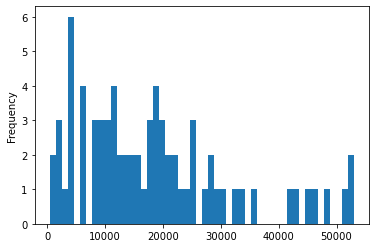

In [52]:
# Plot a histogram of the 'Total' number of properties

ot2009_sorted['Total'].plot.hist(bins=50)

In [87]:
# Extract the 'n_barri' and 'Total' data to produce a bar chart. Note, creating a bar chart
# from the ot2009_sorted geodataframe gave an error.

ot2009data = ot2009_sorted[['n_barri', 'Total']]

In [88]:
# Print first 5 rows to check new dataframe

ot2009data.head()

,n_barri,Total
0,el Raval,32464
1,el Barri G√≤tic,17255
2,la Barceloneta,11627
3,"Sant Pere, Santa Caterina i la Ribera",20051
4,el Fort Pienc,25495


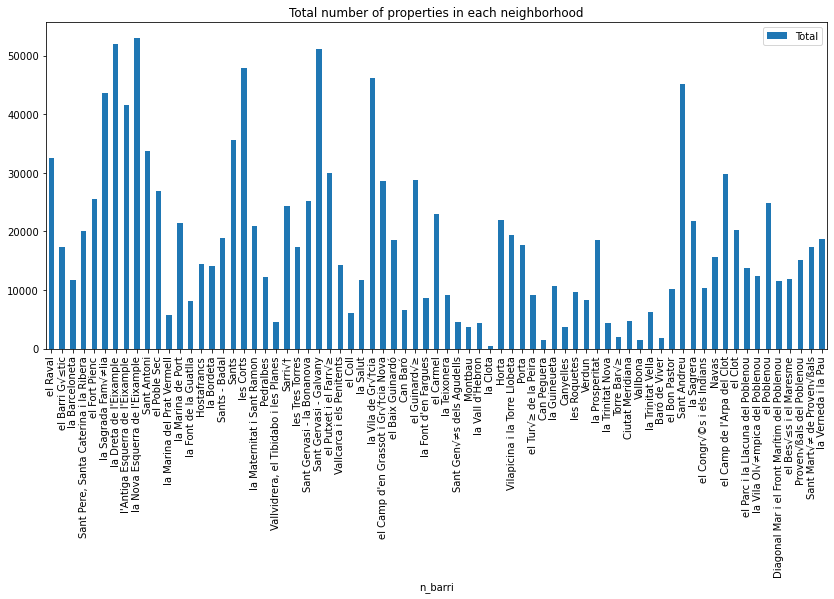

In [94]:
# Print a bar chart with the name of each neighborhood on the x-axis and the total number
# of properties on the y-axis 

ot2009data.plot.bar(figsize = (14, 6), x = 'n_barri', y = 'Total', title = 'Total number of properties in each neighborhood')

### Create maps

Try some overall maps with 'Total' and 'Percent' data. Create one set of subplots side-by-side.

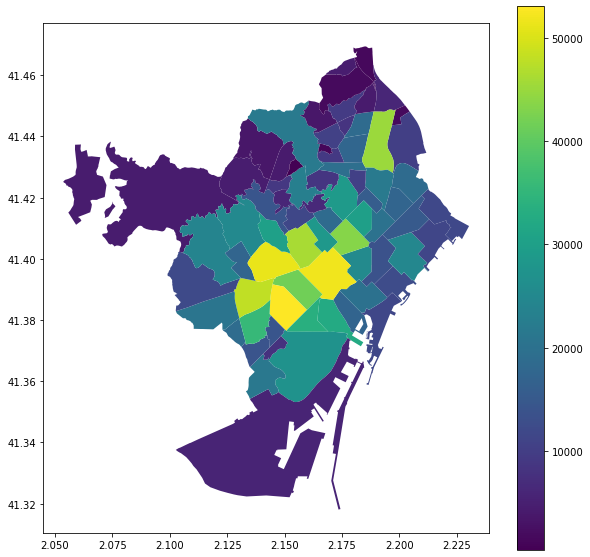

In [95]:
# Test a map! Here's a map of Total properties in each neighborhood. A beautiful moment, really.

ot2009_sorted.plot(figsize=(10,10),column='Total',legend=True)

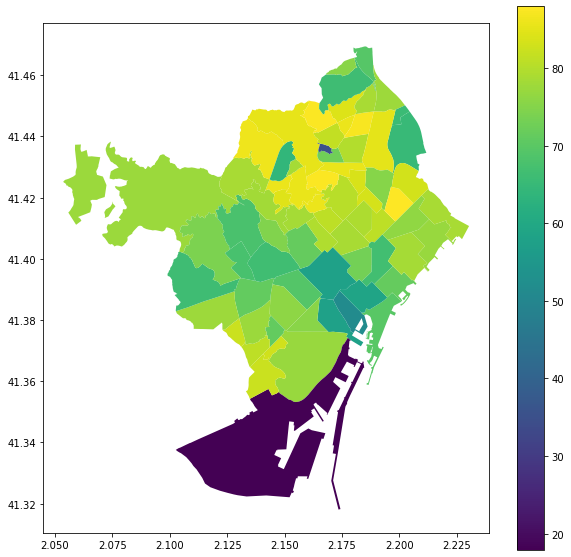

In [98]:
# Since we created percent columns, we can map the percent of properties owned by Spanish nationals in each
# neighborhood

ot2009_sorted.plot(figsize=(10,10),
                   column='Percent Properties Owned by Spanish Nationals',
                   legend=True)

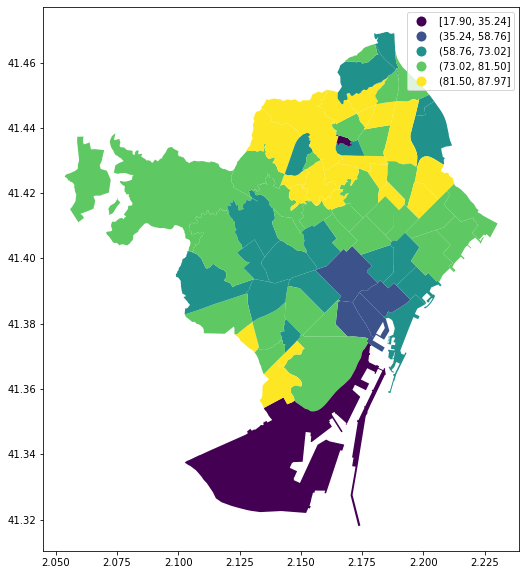

In [99]:
# Here is the same plot, but broken by natural breaks in the data. The first map is more visually appealing. 

ot2009_sorted.plot(figsize=(12,10),
                 column='Percent Properties Owned by Spanish Nationals',
                 cmap='viridis',
                 legend=True, 
                 scheme='NaturalBreaks')

### Create subplots to compare multiple data

Text(0.5, 1.0, 'Percent Properties Owned by Foreigners')

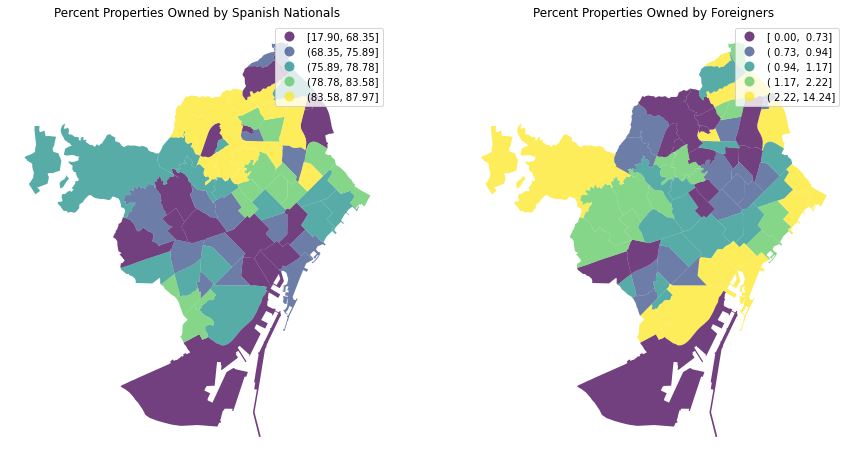

In [108]:
# Create subplots: one row, two plots

fig, axs = plt.subplots(1, 2, figsize=(15, 12))

# name each subplot
ax1, ax2 = axs

# Left map
ot2009_sorted.plot(column = 'Percent Properties Owned by Spanish Nationals', 
            cmap = 'viridis', # Is there a reason this color looks faded (and better) in these subplots?
            scheme = 'quantiles',
            k = 5, # five buckets 
            edgecolor = 'white', 
            linewidth = 0., 
            alpha = 0.75, 
            ax = ax1, # this assigns the map to the subplot,
            legend = True)
           

ax1.axis("off") # turns off x and y axis numbers 
ax1.set_title("Percent Properties Owned by Spanish Nationals") # add a title to ax1

# Right map
ot2009_sorted.plot(column = 'Percent Properties Owned by Foreigners', 
            cmap = 'viridis', 
            scheme = 'quantiles',
            k = 5, 
            edgecolor = 'white', 
            linewidth = 0., 
            alpha = 0.75, 
            ax = ax2, # this assigns the map to the subplot
            legend = True)

ax2.axis("off")
ax2.set_title("Percent Properties Owned by Foreigners")

In [ ]:
# The end!

In [ ]:
# Merge data code that I would like to try at a later date:
# ot2009spa = ot2009_sorted.merge(bb_sorted, on='c_barri')